In [4]:
import pandas as pd

In [72]:
# (1) Используя параметры pandas прочитать красиво пандас (подвох что заголовки - первые 2 линии)
df = pd.read_csv('default_of_credit_card_clients.csv',sep=';', header=1 ) #TODO

In [69]:
dff=df.head(n=20)

In [23]:
# (2) выведите, что за типы переменных, сколько пропусков,
# для численных значений посчитайте пару статистик (в свободной форме)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [9]:
#TODO

df.groupby(['EDUCATION'])[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4"]].median()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4
EDUCATION,,,,
0,6368.5,5798.5,7137.0,8228.5
1,14202.0,13788.0,13920.0,12915.0
2,27224.0,26596.5,24539.5,20903.5
3,25554.0,24336.0,22034.0,19576.0
4,10554.0,10232.0,7184.0,10410.0
5,47313.0,41700.5,38267.5,31705.0
6,47615.0,34770.0,29016.0,20422.0


In [ ]:
#TODO


In [21]:
df[df['PAY_0'] == -1].groupby(['MARRIAGE'])[["PAY_0"]].count().head()

,PAY_0
MARRIAGE,
0,15
1,2759
2,2870
3,42


In [73]:
# (3) посчитать число женщин с университетским образованием
# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

#TODO
count_sex_ed=df['ID'][
    df['SEX'].isin(['2']) & (df['EDUCATION'].isin(['2']))
].count()
count_sex_ed

8656

In [74]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
#TODO

df_PB=df.drop(['SEX','EDUCATION','MARRIAGE','LIMIT_BAL','AGE','ID'], axis=1)
df_PB.groupby('default payment next month').median()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,23119.5,21660.5,20202.5,19000.0,17998.0,16679.0,2459.5,2247.5,2000.0,1734.0,1765.0,1706.0
1,1.0,0.0,0.0,0.0,0.0,0.0,20185.0,20300.5,19834.5,19119.5,18478.5,18028.5,1636.0,1533.5,1222.0,1000.0,1000.0,1000.0


In [59]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE

#TODO
dfi=df.drop(['ID'], axis=1)
pd.pivot_table(dfi,index=['SEX', 'EDUCATION','MARRIAGE']).round(2)


AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
SEX EDUCATION MARRIAGE                                                      
1   0         1         41.00   11612.50    4326.00    7871.00   20295.50   
              2         36.50   11051.67   11051.67   17312.50   10767.33   
    1         0         37.00     298.00     750.00     179.00    1576.00   
              1         42.42   60196.89   56841.28   55180.53   51360.94   
              2         31.70   54064.40   52811.89   49665.84   46617.54   
              3         44.53   64661.73   60919.27   60893.43   57469.50   
    2         0         38.00     176.00     252.00       0.00       0.00   
              1         40.33   56465.22   54125.95   51740.36   47514.23   
              2         31.58   50926.28   48499.19   45166.26   41269.72   
              3         40.70   35491.22   32247.70   32142.62   25978.33   
    3         0         38.00   26227.92   31324.00   18821.58   21236.00   
              1         44.34   55910.69   52443.88   50041.39   43583.30   
              2         35.38   45000.68   43400.73   40058.41   35999.02   
              3         47.72   38469.97   36403.47   35446.89   24827.14   
    4         1         41.78   76830.78   60217.83   55899.44   54168.44   
              2         28.17   64118.74   56253.09   56504.96   41932.00   
              3         27.00    3462.00    1147.00    7002.00       0.00   
    5         1         39.35  104611.79   99782.92   87338.75   78269.44   
              2         32.63   74828.09   70983.93   64845.78   53557.78   
              3         44.00   40199.00   39218.00   35464.00   30456.00   
    6         1         48.00   78274.50   67747.07   58433.64   34296.29   
              2         40.36   37394.55   38328.82   34404.09   30280.27   
2   0         1         37.50   22374.50   23274.00   28682.50   23983.00   
              2         42.00    7662.25    4821.00   17079.50    8435.50   
    1         0         36.33    3148.67    1785.33   11485.67   26227.67   
              1         38.87   44337.77   43080.45   43686.19   40539.82   
              2         30.16   43004.11   41783.86   40540.30   38311.94   
              3         38.15   55192.75   41806.85   32292.60   35471.15   
    2         0         35.80   31881.40   35419.20   35889.60   33039.00   
              1         37.53   54135.56   51873.17   48833.04   45074.86   
              2         30.41   53866.08   51843.87   49790.42   45934.76   
              3         40.87   43196.60   40408.94   36221.74   31244.81   
    3         0         38.22   19299.09   22961.12   18741.84   16440.75   
              1         42.36   45768.90   44013.48   42716.72   38414.98   
              2         36.24   46695.18   44834.03   43072.26   38887.51   
              3         46.06   35120.84   34891.49   31014.06   25805.33   
    4         1         37.94   36574.38   34017.35   33846.71   33560.82   
              2         30.36   58092.51   50716.13   45843.69   38999.44   
              3         40.50     442.50     649.00    3224.00   15816.00   
    5         1         37.73   79611.73   75950.61   77164.23   69553.53   
              2         32.23   73882.59   63430.01   59147.69   47816.99   
              3         37.50  121721.00  114733.00  107898.00  109266.00   
    6         1         45.00   85957.57   85063.79   71657.00   68506.93   
              2         40.90  111611.00  110975.70  108286.50   97425.20   
              3         42.00  181866.00  160283.00  158661.50   10327.00   

                        BILL_AMT5  BILL_AMT6  LIMIT_BAL  PAY_0  PAY_2  \
SEX EDUCATION MARRIAGE                                                  
1   0         1           1926.50    2901.50  205000.00  -1.50  -1.50   
              2           7372.17     934.50  215000.00   0.00  -0.83   
    1         0            497.00      -3.00  300000.00  -1.00  -1.00   
              1          48348.44   46303

In [68]:
def new_col_(i):
    if i <=10000: return 'A',
    elif 10000 < i <=100000: return 'B'
    elif 100000 < i <=200000: return'C'
    elif 200000 < i <=400000: return'D'
    elif 400000 < i <=700000: return 'E'
    elif 700000 < i:  return 'F'       
    
        
dff['new_col']=dff['LIMIT_BAL'].map(new_col_)
dff.head(n=20)



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,new_col
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,B
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,C
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,B
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,B
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,B
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,B
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,E
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,B
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,C
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,B


In [75]:
%matplotlib inline
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd


In [ ]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013C8BE639B0>]], dtype=object)

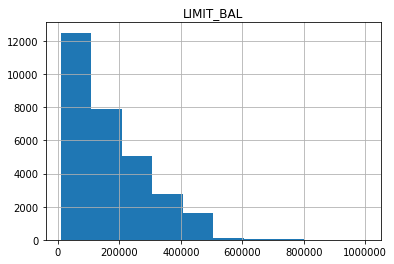

In [76]:
df #TODO
df.hist(column='LIMIT_BAL')

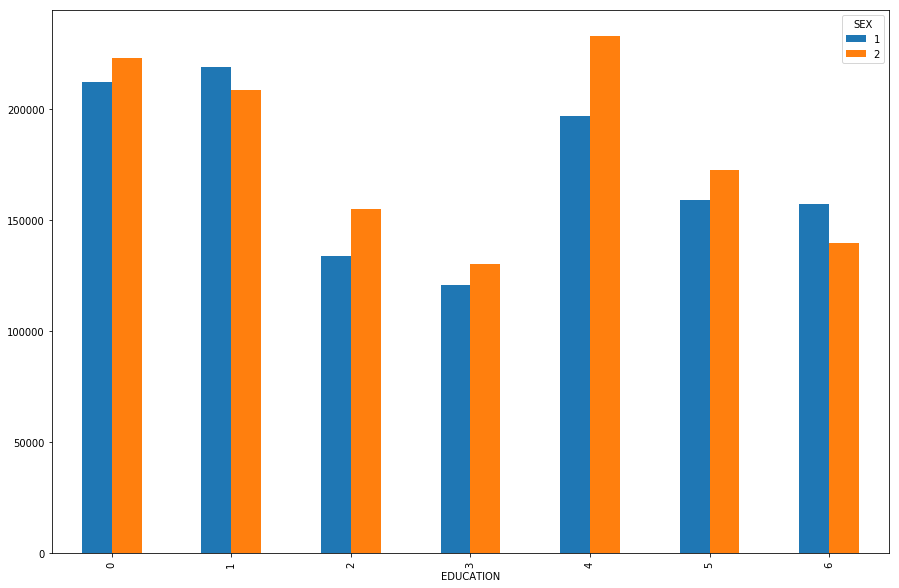

In [77]:
# (8) построить зависимость кредитного лимита от образования для каждого пола
# график необходимо сделать очень широким (на весь экран)
 #TODO
fig,ax = plt.subplots(figsize=(15,10))
df.pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax)

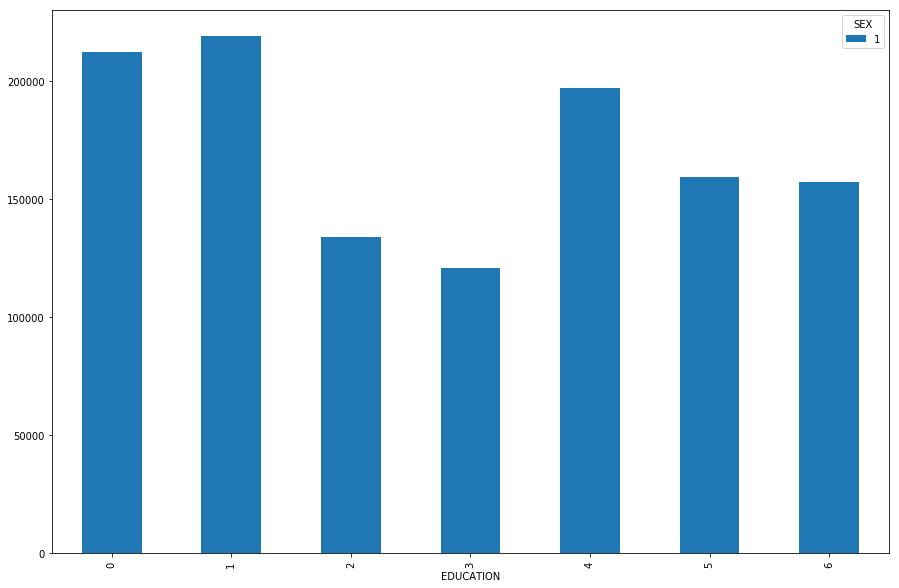

In [81]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#TODO

fig,ax = plt.subplots(figsize=(15,10))
df[df['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX').plot(kind='bar', ax=ax)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


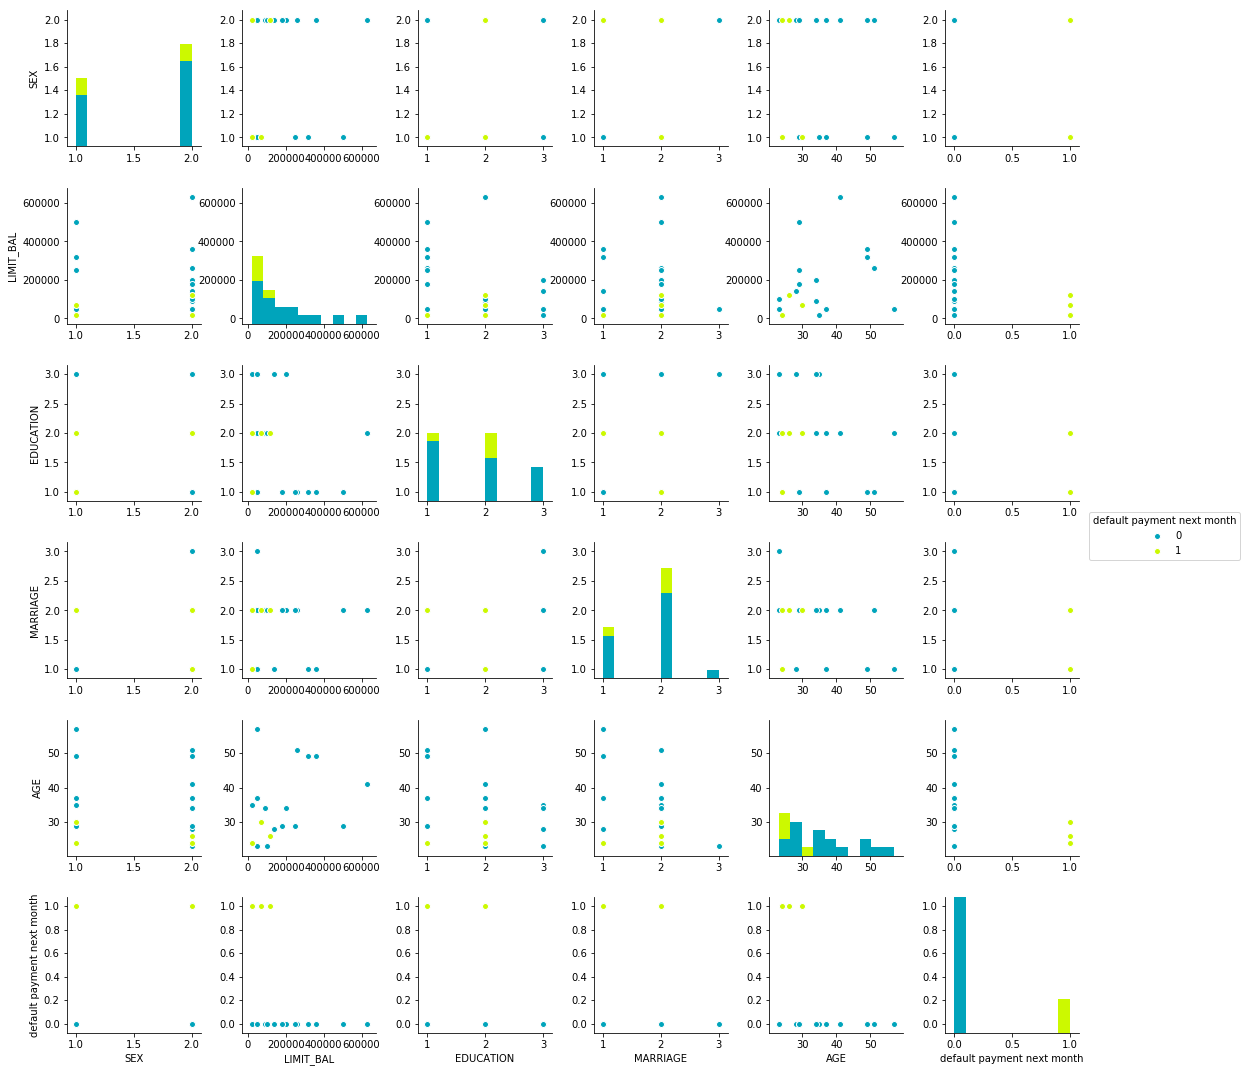

In [104]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn as sns

#TODO
#dff[dff['SEX'] == 1].pivot_table('LIMIT_BAL', 'EDUCATION', 'SEX')

dffs=dff[['SEX','LIMIT_BAL','EDUCATION','MARRIAGE', 'AGE','default payment next month']]
sns.pairplot(dffs, hue='default payment next month',palette='spectral')


#'SEX','LIMIT_BAL','EDUCATION','MARRIAGE', 'AGE','default payment next month'
#sns.pairplot(dffs, hue='default payment next month')